# Map: Airports of the World
2019 Edition!

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

## Read the Data
We're using Pandas, because it is awesome for making these kinds of explorations easy

In [14]:
# from here: http://ourairports.com/data/airports.csv
file = 'airports.csv'

df = pd.read_csv(file)
df.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

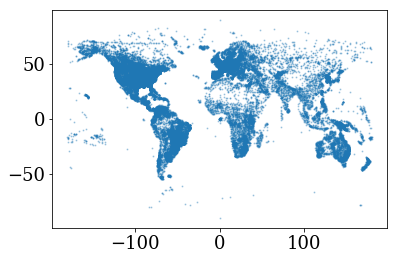

In [26]:
plt.scatter(df['longitude_deg'], df['latitude_deg'], s=1, alpha=0.3)

## Location Types
What kinds of airports/locations are in the data? Pandas makes this super easy for us:

In [13]:
df['type'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

## Make a simple but neat map!
just as above, but controlling the asthetic a bit

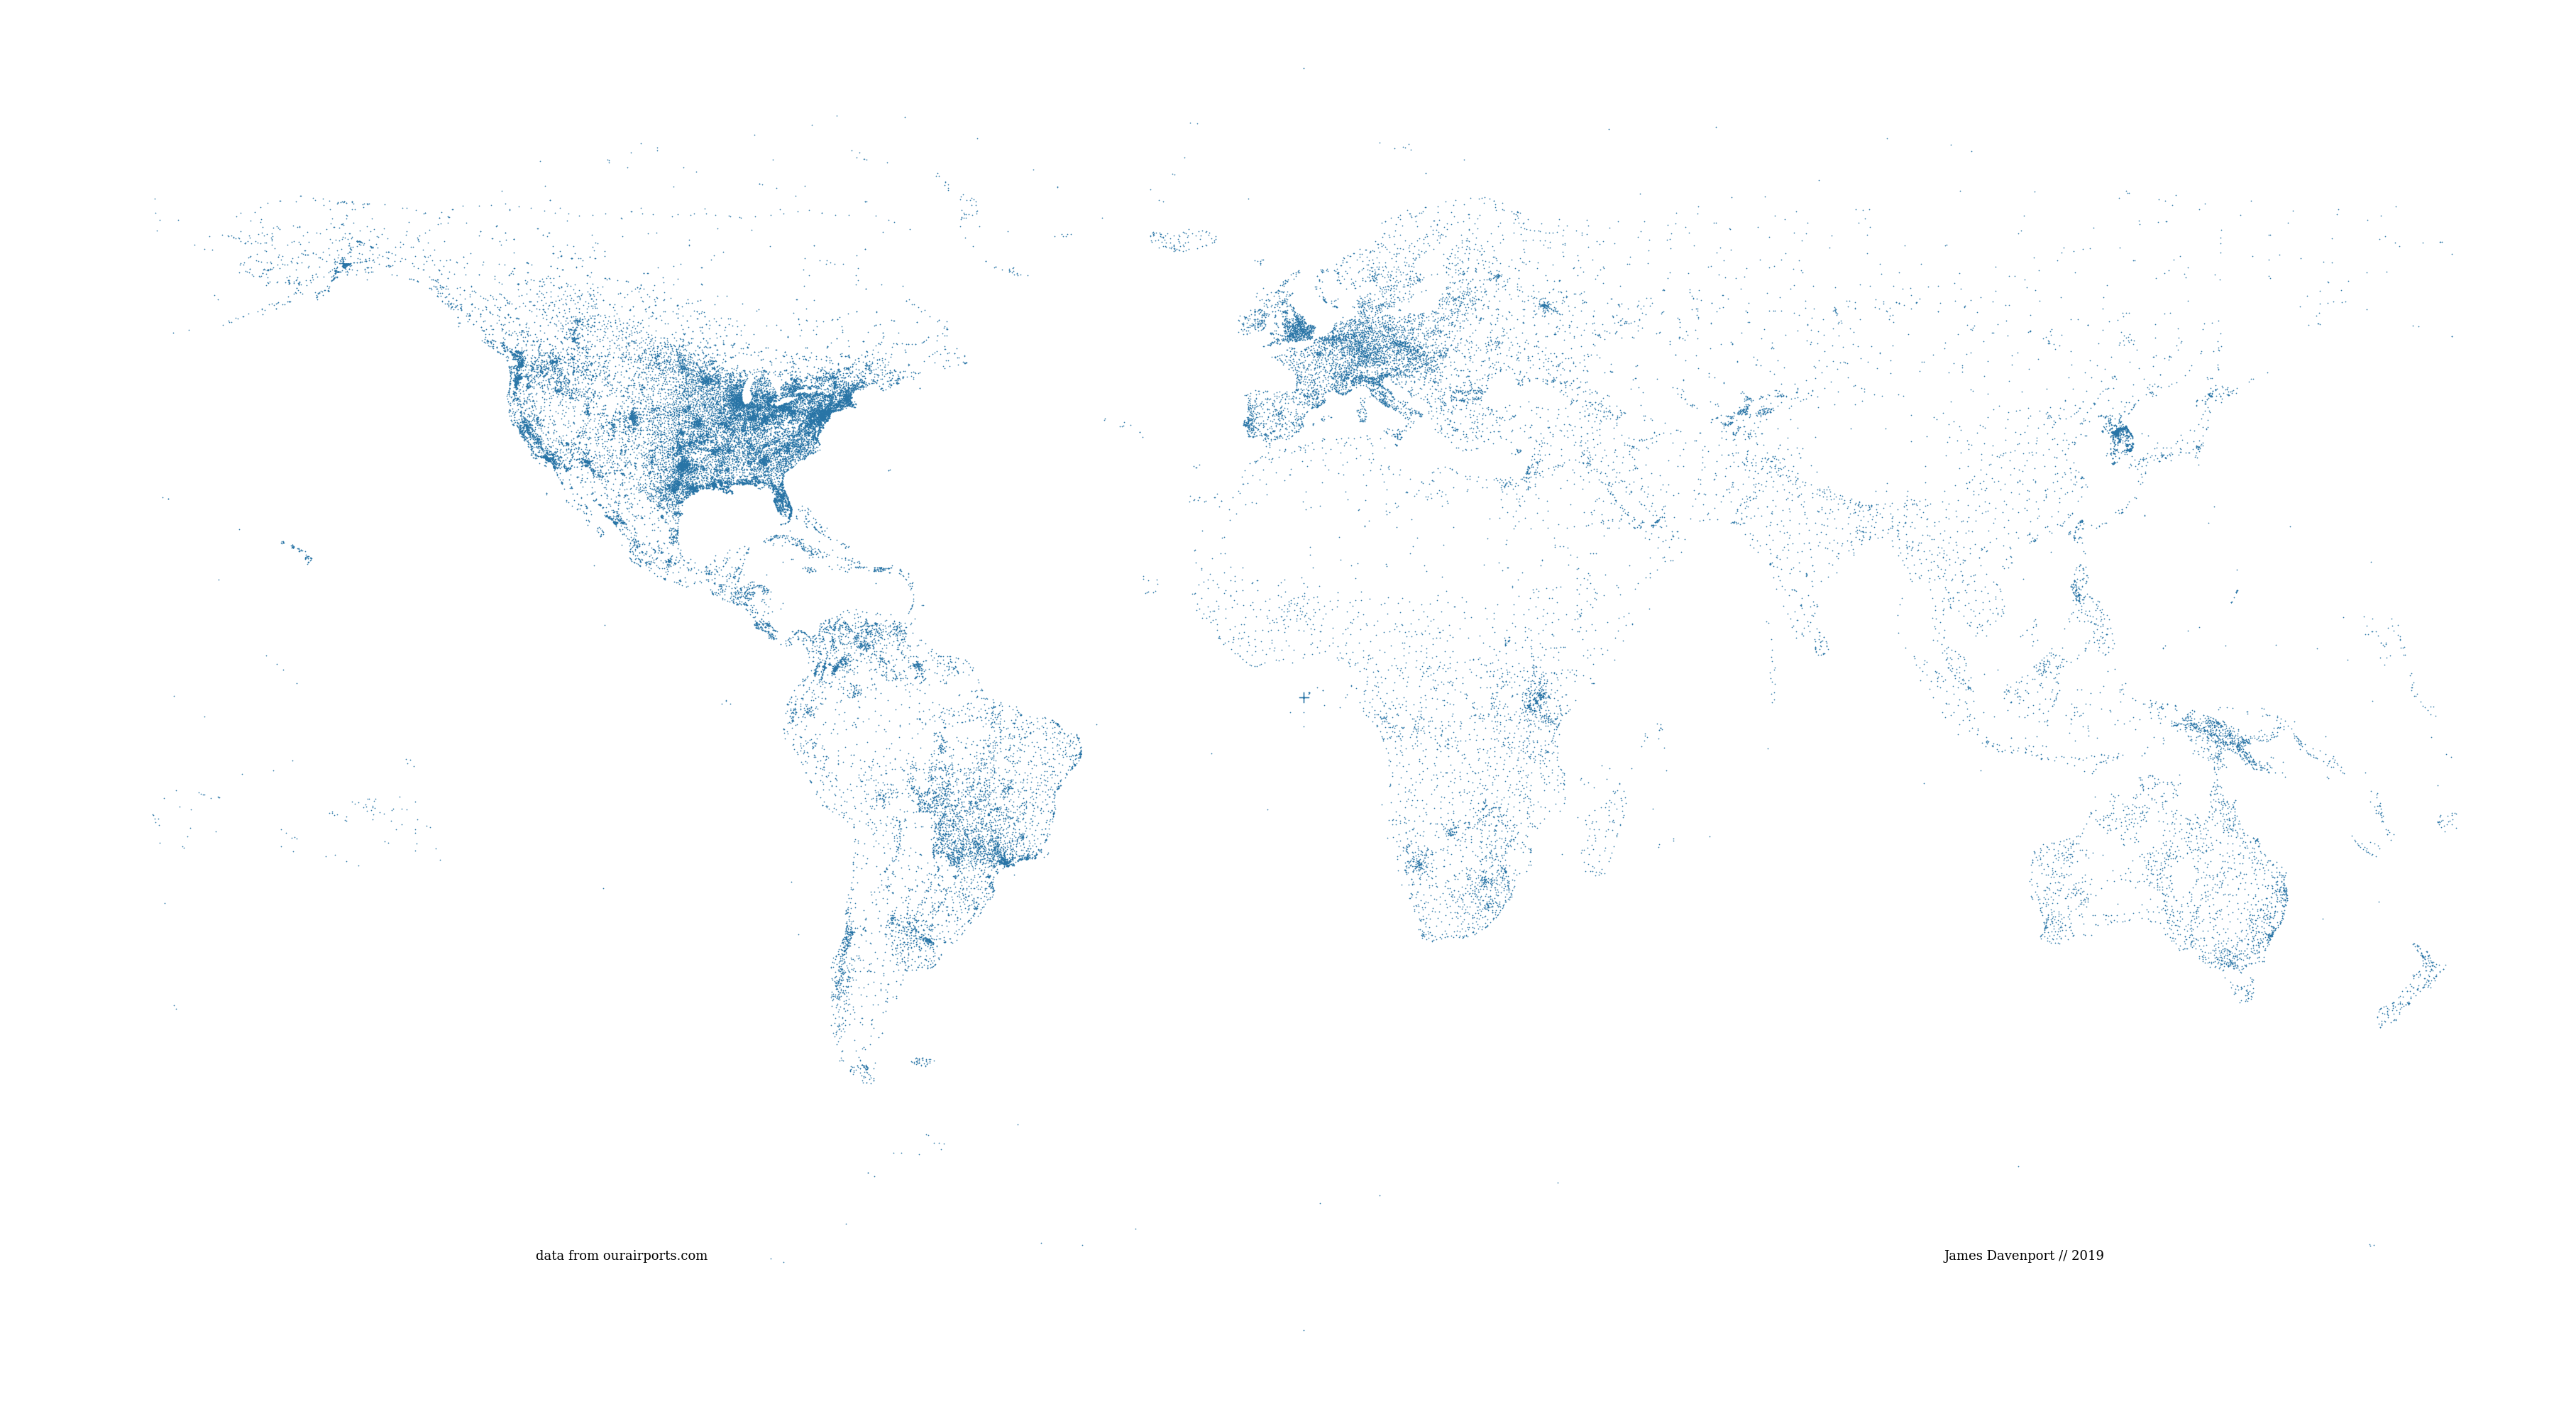

In [7]:
plt.figure(figsize=(64,36))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=2, alpha=0.95, c='#2874A6', marker='.')

plt.axis('off')

plt.text(100,-80, 'James Davenport // 2019')
plt.text(-120, -80, 'data from ourairports.com')
plt.savefig("airport_map2019.jpeg", bbox_inches='tight', dpi=250)

a now with a bit more contrast for easier viewing!

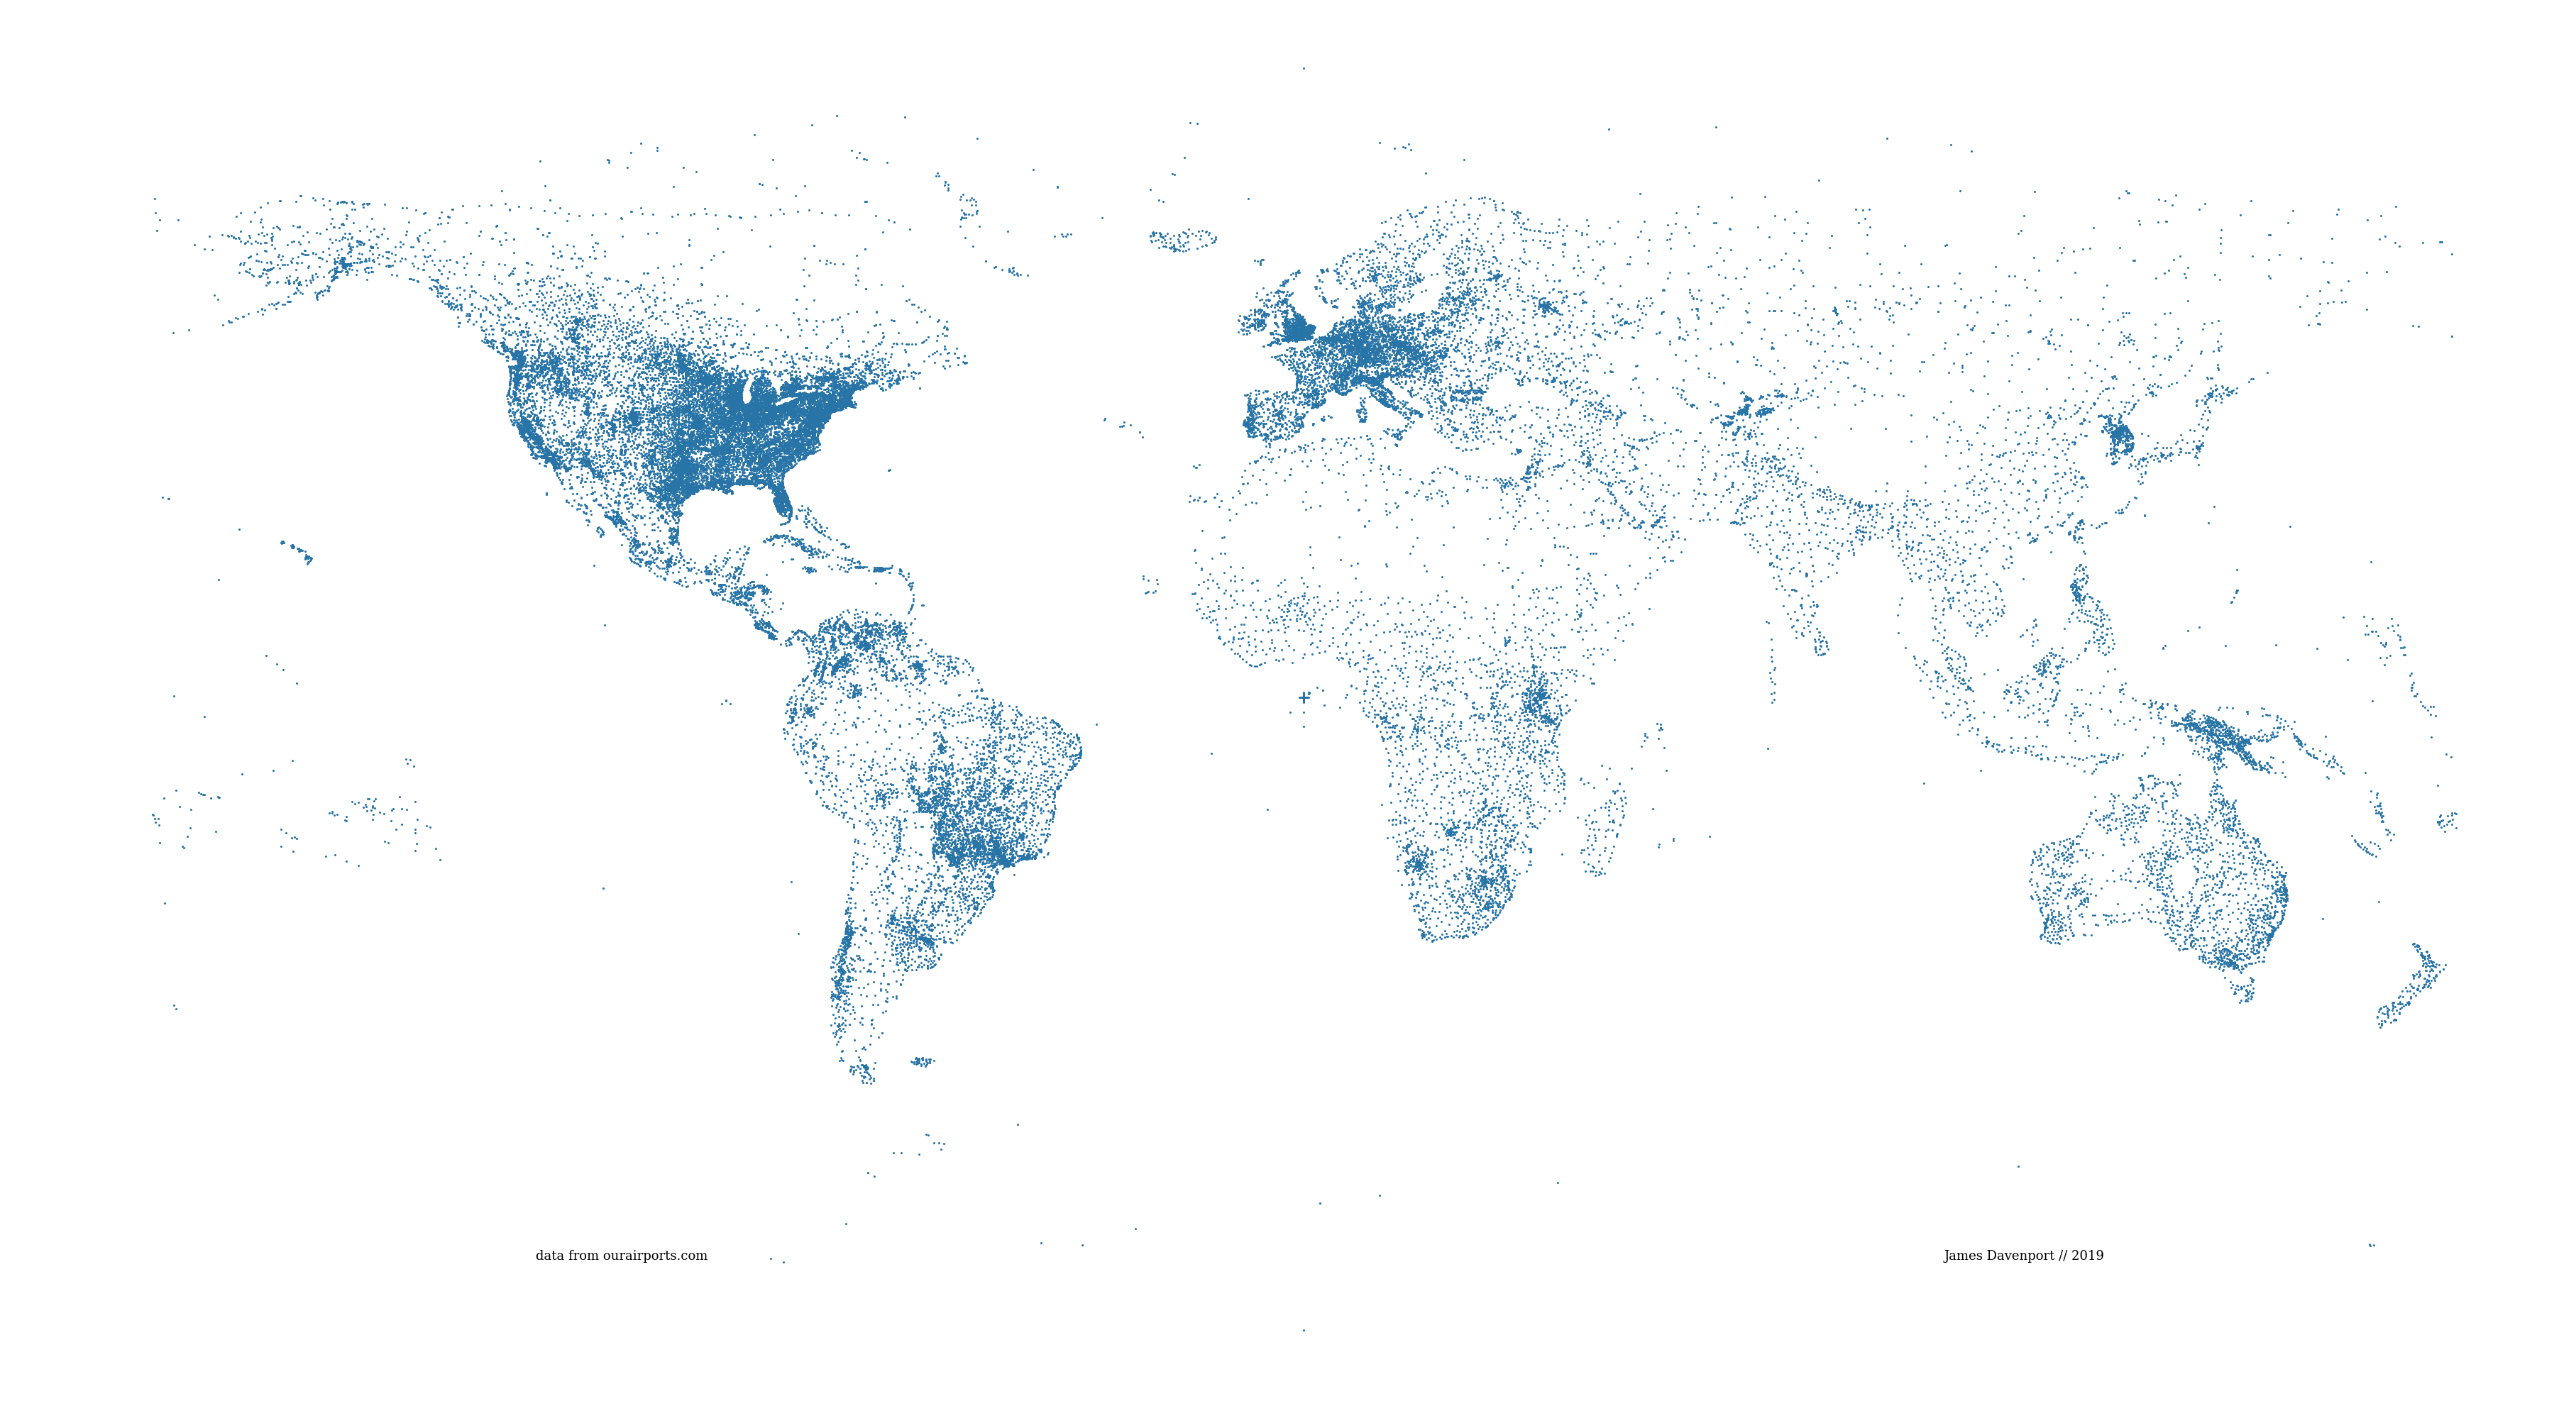

In [8]:
plt.figure(figsize=(64,36))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=4, c='#2874A6')

plt.axis('off')

plt.text(100,-80, 'James Davenport // 2019')
plt.text(-120, -80, 'data from ourairports.com')
plt.savefig("airport_map2019_heavy.jpeg", bbox_inches='tight', dpi=250)

## Data Entry Problems?
What's the cross of locations off the coast of Nigeria

(-20, 20)

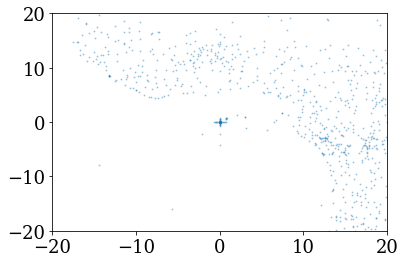

In [15]:
plt.scatter(df['longitude_deg'], df['latitude_deg'], s=1, alpha=0.3)
plt.xlim(-20,20)
plt.ylim(-20,20)

ah ha! data entry problems...

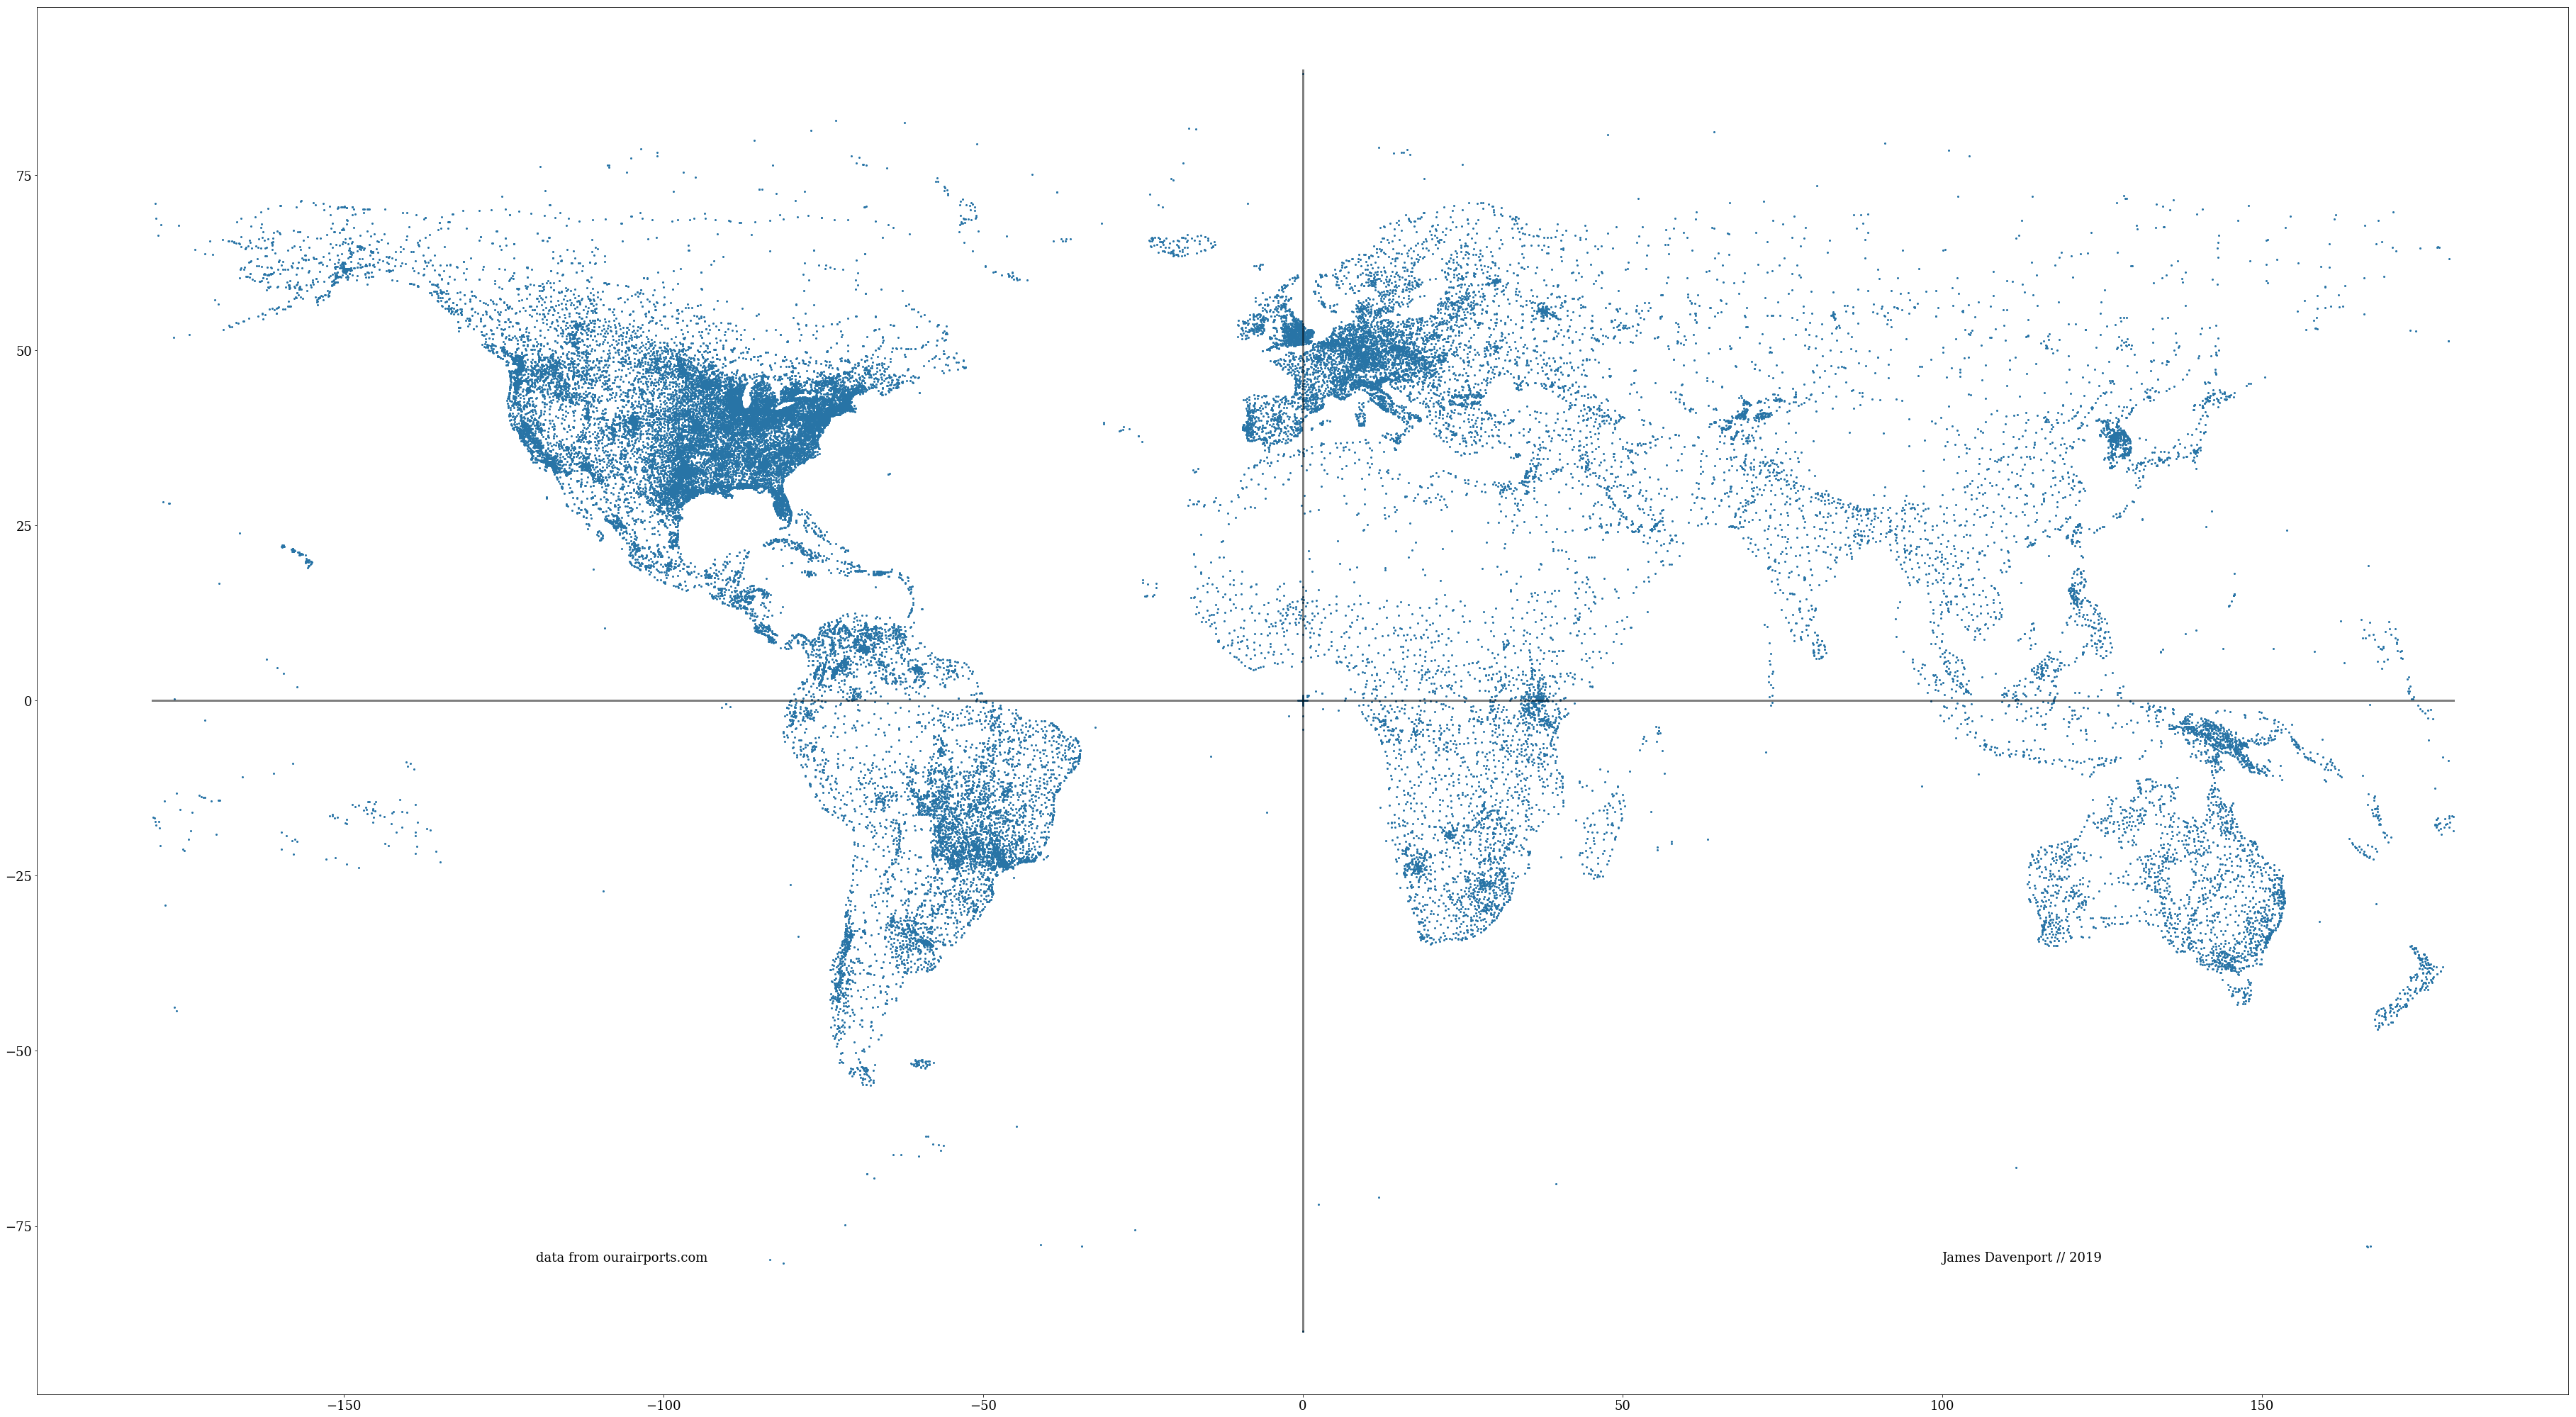

In [9]:
plt.figure(figsize=(64,36))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=4, c='#2874A6')

plt.plot([0,0], [-90,90], c='k', alpha=0.5, lw=3)
plt.plot([-180,180], [0,0], c='k', alpha=0.5, lw=3)

plt.text(100,-80, 'James Davenport // 2019')
plt.text(-120, -80, 'data from ourairports.com')
plt.savefig("airport_map2019_heavylines.jpeg", bbox_inches='tight', dpi=250)

## Other Data
This table contains a bit of other information - including elevation. Lets color the map with that:

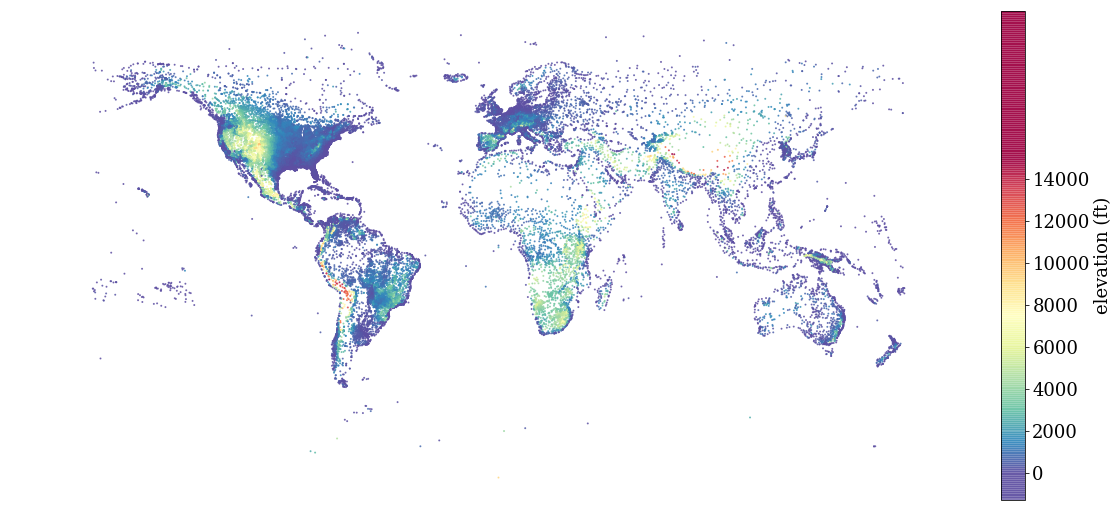

In [24]:
plt.figure(figsize=(20,9))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=4, alpha=0.75, c=df['elevation_ft'], marker='.', cmap=plt.cm.Spectral_r)

plt.axis('off')
cb = plt.colorbar()
cb.set_label('elevation (ft)')
cb.set_clim(0,15000) # blow the color bar out at the top end

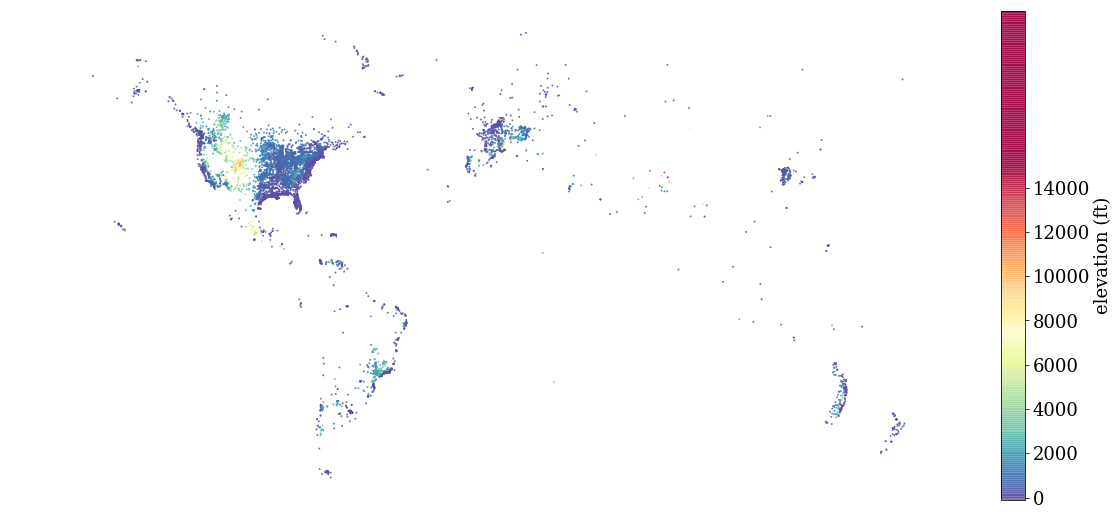

In [25]:
hp = df['type'] == 'heliport'

plt.figure(figsize=(20,9))

plt.scatter(df['longitude_deg'][hp], df['latitude_deg'][hp], 
            s=4, alpha=0.75, c=df['elevation_ft'][hp], marker='.', cmap=plt.cm.Spectral_r)

plt.axis('off')
cb = plt.colorbar()
cb.set_label('elevation (ft)')
cb.set_clim(0,15000)